<a href="https://colab.research.google.com/github/kridtapon/ER-Q-Reversal-System/blob/main/ER_Q_Reversal_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
pip install vectorbt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 527.6/527.6 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.7/295.7 kB 10.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 4.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 14.9 MB/s eta 0:00:00


In [2]:
pip install --upgrade yfinance

[*********************100%***********************]  1 of 1 completed


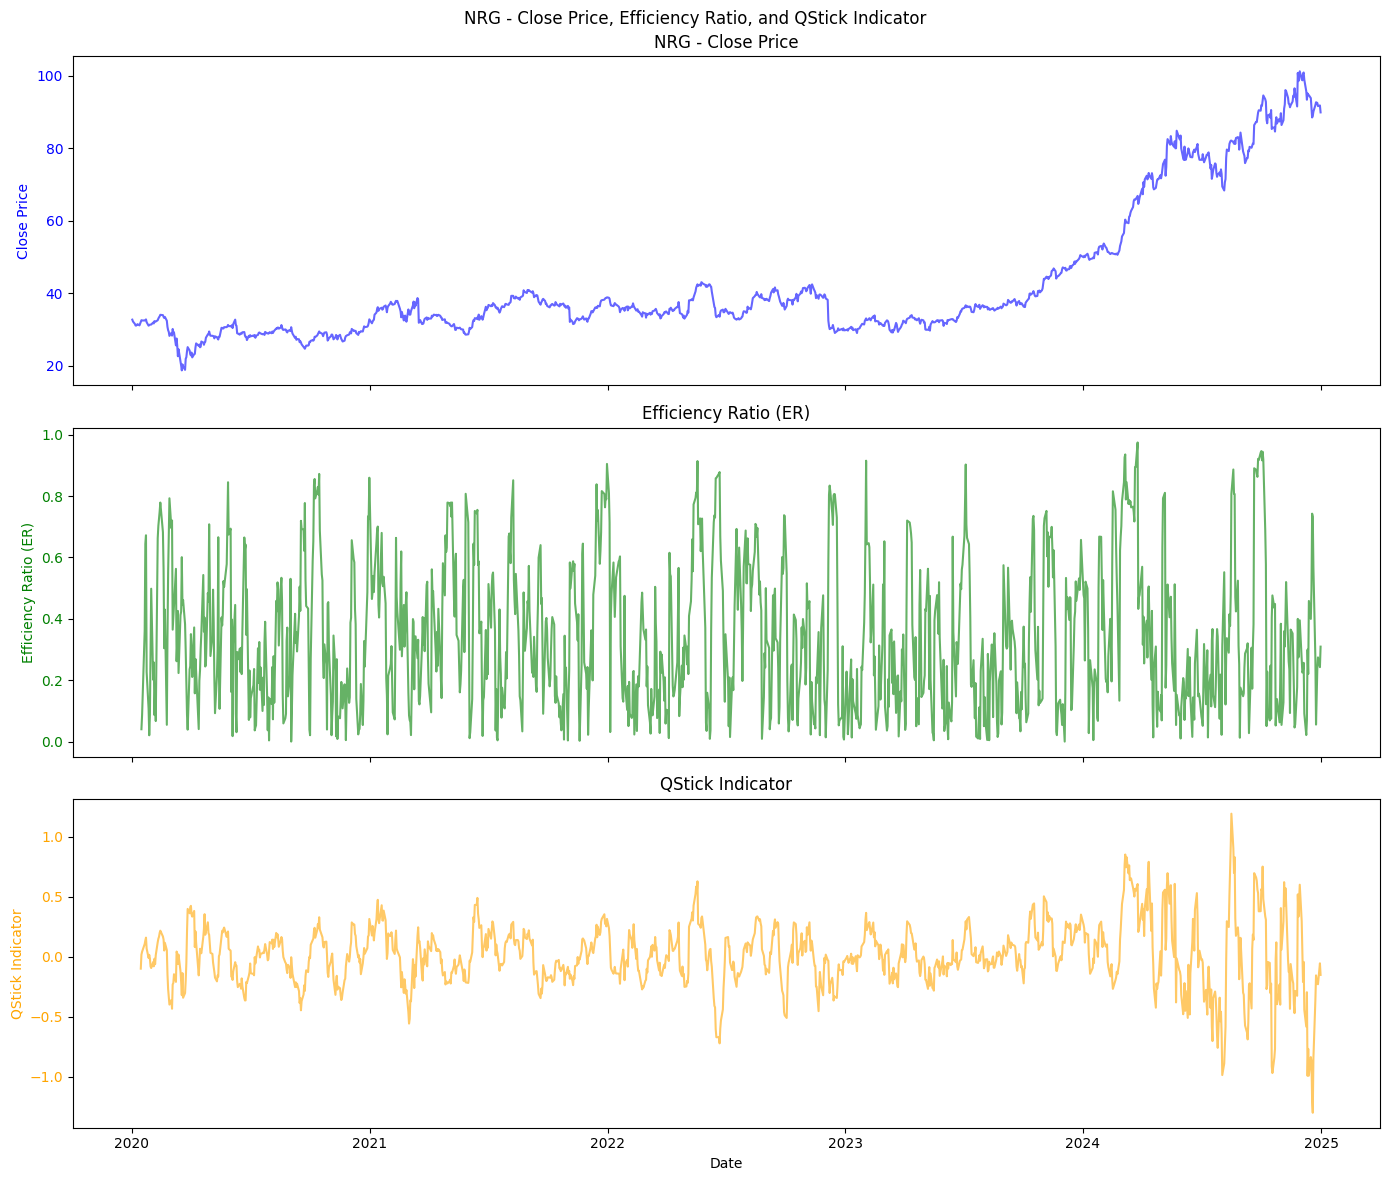

In [17]:
import matplotlib.pyplot as plt
import yfinance as yf

# Function to calculate Efficiency Ratio (ER)
def calculate_efficiency_ratio(df, period=10):
    """
    Calculate Efficiency Ratio (ER), which measures trend strength.
    """
    direction = abs(df['Close'].diff(period))
    volatility = df['Close'].diff().abs().rolling(window=period).sum()
    efficiency_ratio = direction / volatility
    return efficiency_ratio

# Function to calculate QStick Indicator
def calculate_qstick(df, period=10):
    """
    Calculate QStick Indicator, a smoothed version of candlestick open-close differences.
    """
    qstick = df['Close'] - df['Open']
    qstick_sma = qstick.rolling(window=period).mean()
    return qstick_sma

# Define the stock symbol and time period
symbol = 'NRG'  # Example stock
start_date = '2020-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate Efficiency Ratio (ER)
df['ER'] = calculate_efficiency_ratio(df, period=10)

# Calculate QStick Indicator
df['QStick'] = calculate_qstick(df, period=10)

# Create a figure with three subplots (one for each component)
fig, axs = plt.subplots(3, 1, figsize=(14, 12), sharex=True)

# Plot the Close Price on the first panel
axs[0].plot(df.index, df['Close'], label='Close Price', color='blue', alpha=0.6)
axs[0].set_ylabel('Close Price', color='blue')
axs[0].tick_params(axis='y', labelcolor='blue')
axs[0].set_title(f'{symbol} - Close Price')

# Plot the Efficiency Ratio (ER) on the second panel
axs[1].plot(df.index, df['ER'], label='Efficiency Ratio (ER)', color='green', alpha=0.6)
axs[1].set_ylabel('Efficiency Ratio (ER)', color='green')
axs[1].tick_params(axis='y', labelcolor='green')
axs[1].set_title('Efficiency Ratio (ER)')

# Plot the QStick Indicator on the third panel
axs[2].plot(df.index, df['QStick'], label='QStick Indicator', color='orange', alpha=0.6)
axs[2].set_ylabel('QStick Indicator', color='orange')
axs[2].tick_params(axis='y', labelcolor='orange')
axs[2].set_title('QStick Indicator')

# Set common x-axis label
axs[2].set_xlabel('Date')

# Title for the whole figure
fig.suptitle(f'{symbol} - Close Price, Efficiency Ratio, and QStick Indicator')

# Adjust layout
fig.tight_layout()

# Show the plot
plt.show()


In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt

# Function to calculate Efficiency Ratio (ER)
def calculate_efficiency_ratio(df, period=10):
    """
    Calculate Efficiency Ratio (ER), which measures trend strength.
    """
    direction = abs(df['Close'].diff(period))
    volatility = df['Close'].diff().abs().rolling(window=period).sum()
    efficiency_ratio = direction / volatility
    return efficiency_ratio

# Function to calculate QStick Indicator
def calculate_qstick(df, period=10):
    """
    Calculate QStick Indicator, a smoothed version of candlestick open-close differences.
    """
    qstick = df['Close'] - df['Open']
    qstick_sma = qstick.rolling(window=period).mean()
    return qstick_sma

# Define the stock symbol and time period
symbol = 'META'  # Example stock
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Calculate Efficiency Ratio (ER)
df['ER'] = calculate_efficiency_ratio(df, period=10)

# Calculate QStick Indicator
df['QStick'] = calculate_qstick(df, period=10)

# Filter data for the test period (2020-2025)
df = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

# Define Entry and Exit signals based on ER & QStick
df['Entry'] = (df['ER'] > 0.6) & (df['QStick'] > 0)
df['Exit'] = (df['ER'] > 0.6) & (df['QStick'] < 0)

# Backtest using vectorbt
portfolio = vbt.Portfolio.from_signals(
    close=df['Close'],
    entries=df['Entry'],
    exits=df['Exit'],
    init_cash=100_000,
    fees=0.001
)

# Display performance metrics
print(portfolio.stats())

# Plot equity curve
portfolio.plot().show()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'sharpe_ratio' requires frequency to be set
  warnings.warn(warning_message)
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'calmar_ratio' requires frequency to be set
  warnings.warn(warning_message)
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'omega_ratio' requires frequency to be set
  warnings.warn(warning_message)
/usr/local/lib/python3.11/dist-packages/vectorbt/generic/stats_builder.py:396: UserWarning: Metric 'sortino_ratio' requires frequency to be set
  warnings.warn(warning_message)


Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                           312251.729182
Total Return [%]                       212.251729
Benchmark Return [%]                   180.172857
Max Gross Exposure [%]                      100.0
Total Fees Paid                       3930.513069
Max Drawdown [%]                        47.904477
Max Drawdown Duration                       413.0
Total Trades                                   13
Total Closed Trades                            12
Total Open Trades                               1
Open Trade PnL                        1401.189477
Win Rate [%]                            58.333333
Best Trade [%]                         143.186397
Worst Trade [%]                        -22.388319
Avg Winning Trade [%]                   36.408641
Avg Losing Trade [%]                   -12.849162


Streaming output truncated to the last 5000 lines.
<ipython-input-16-8593afe66f1e>:44: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-8593afe66f1e>:43: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-16-8593afe66f1e>:44: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#ret

Best Parameters:
ER_period           10.000000
QStick_period        6.000000
ER_threshold         0.600000
Total Return [%]     3.904812
Name: 734, dtype: float64
Start                         2020-01-02 00:00:00
End                           2024-12-31 00:00:00
Period                                       1258
Start Value                              100000.0
End Value                           490481.233177
Total Return [%]                       390.481233
Benchmark Return [%]                   175.103194
Max Gross Exposure [%]                      100.0
Total Fees Paid                       3553.876803
Max Drawdown [%]                        21.942491
Max Drawdown Duration                       245.0
Total Trades                                   10
Total Closed Trades                            10
Total Open Trades                               0
Open Trade PnL                                0.0
Win Rate [%]                                 80.0
Best Trade [%]                       

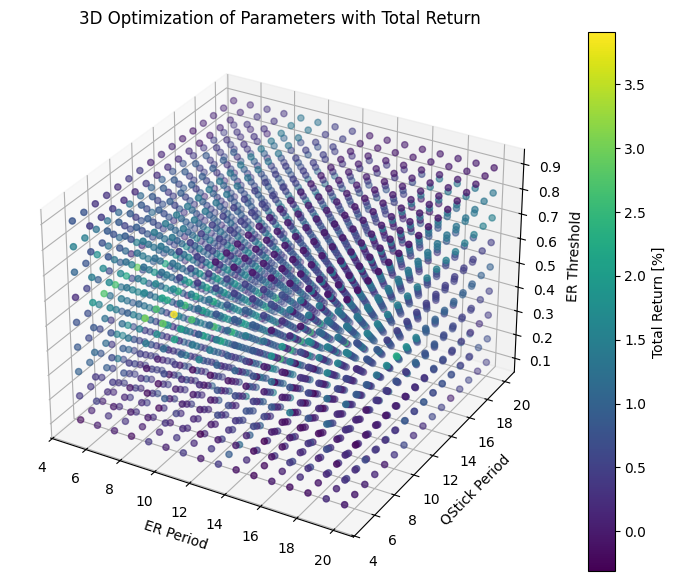

In [16]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
from itertools import product

# Function to calculate Efficiency Ratio (ER)
def calculate_efficiency_ratio(df, period=10):
    period = int(period)
    direction = abs(df['Close'].diff(period))
    volatility = df['Close'].diff().abs().rolling(window=period).sum()
    efficiency_ratio = direction / volatility
    return efficiency_ratio

# Function to calculate QStick Indicator
def calculate_qstick(df, period=10):
    period = int(period)
    qstick = df['Close'] - df['Open']
    qstick_sma = qstick.rolling(window=period).mean()
    return qstick_sma

# Define the stock symbol and time period
symbol = 'NRG'  #
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Define a function for backtesting with optimized parameters
def backtest_strategy(ER_period, QStick_period, ER_threshold):
    # Calculate Efficiency Ratio (ER)
    df['ER'] = calculate_efficiency_ratio(df, period=ER_period)

    # Calculate QStick Indicator
    df['QStick'] = calculate_qstick(df, period=QStick_period)

    # Filter data for the test period (2020-2025)
    df_filtered = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

    # Define Entry and Exit signals based on ER & QStick thresholds
    df_filtered['Entry'] = (df_filtered['ER'] > ER_threshold) & (df_filtered['QStick'] > 0)
    df_filtered['Exit'] = (df_filtered['ER'] > ER_threshold) & (df_filtered['QStick'] < 0)

    # Backtest using vectorbt
    portfolio = vbt.Portfolio.from_signals(
        close=df_filtered['Close'],
        entries=df_filtered['Entry'],
        exits=df_filtered['Exit'],
        init_cash=100_000,
        fees=0.001
    )

    return portfolio

# Define parameter ranges for optimization
ER_period_range = range(5, 21)
QStick_period_range = range(5, 21)
ER_threshold_range = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]

# Create all combinations of parameter values
param_combinations = product(ER_period_range, QStick_period_range, ER_threshold_range)

# Store results for analysis
results = []

# Iterate over parameter combinations
for ER_period, QStick_period, ER_threshold in param_combinations:
    portfolio = backtest_strategy(ER_period, QStick_period, ER_threshold)

    # Get final portfolio value (or any other performance metric)
    total_return = portfolio.total_return()
    results.append((ER_period, QStick_period, ER_threshold, total_return))

# Convert results to DataFrame for easy analysis
results_df = pd.DataFrame(results, columns=['ER_period', 'QStick_period', 'ER_threshold', 'Total Return [%]'])

# Find the best performing combination
best_params = results_df.loc[results_df['Total Return [%]'].idxmax()]

# Display the best parameters
print("Best Parameters:")
print(best_params)

# Backtest with best parameters and display performance
best_portfolio = backtest_strategy(
    ER_period=best_params['ER_period'],
    QStick_period=best_params['QStick_period'],
    ER_threshold=best_params['ER_threshold']
)

# Display performance metrics of the best portfolio
print(best_portfolio.stats())

# Plot equity curve of the best portfolio
best_portfolio.plot().show()

# Plot the 3D surface plot for total return as a function of ER_period, QStick_period, and ER_threshold
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a grid for the 3D surface plot
x = results_df['ER_period']
y = results_df['QStick_period']
z = results_df['ER_threshold']
total_return = results_df['Total Return [%]']

# Plotting the 3D scatter
sc = ax.scatter(x, y, z, c=total_return, cmap='viridis')

# Add labels
ax.set_xlabel('ER Period')
ax.set_ylabel('QStick Period')
ax.set_zlabel('ER Threshold')
ax.set_title('3D Optimization of Parameters with Total Return')

# Add color bar to show the color scale
fig.colorbar(sc, ax=ax, label='Total Return [%]')

# Show the plot
plt.show()

In [ ]:
import numpy as np
import pandas as pd
import yfinance as yf
import vectorbt as vbt
from itertools import product
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Function to calculate Efficiency Ratio (ER)
def calculate_efficiency_ratio(df, period=10):
    direction = abs(df['Close'].diff(period))
    volatility = df['Close'].diff().abs().rolling(window=period).sum()
    efficiency_ratio = direction / volatility
    return efficiency_ratio

# Function to calculate QStick Indicator
def calculate_qstick(df, period=10):
    qstick = df['Close'] - df['Open']
    qstick_sma = qstick.rolling(window=period).mean()
    return qstick_sma

# Define the stock symbol and time period
symbol = 'META'  #
start_date = '2019-01-01'
end_date = '2025-01-01'

# Download the data
df = yf.download(symbol, start=start_date, end=end_date)
df.columns = ['Close', 'High', 'Low', 'Open', 'Volume']

# Define a function for backtesting with optimized parameters
def backtest_strategy(ER_period, QStick_period, ER_threshold):
    # Calculate Efficiency Ratio (ER)
    df['ER'] = calculate_efficiency_ratio(df, period=ER_period)

    # Calculate QStick Indicator
    df['QStick'] = calculate_qstick(df, period=QStick_period)

    # Filter data for the test period (2020-2025)
    df_filtered = df[(df.index.year >= 2020) & (df.index.year <= 2025)]

    # Define Entry and Exit signals based on ER & QStick thresholds
    df_filtered['Entry'] = (df_filtered['ER'] > ER_threshold) & (df_filtered['QStick'] > 0)
    df_filtered['Exit'] = (df_filtered['ER'] > ER_threshold) & (df_filtered['QStick'] < 0)

    # Backtest using vectorbt
    portfolio = vbt.Portfolio.from_signals(
        close=df_filtered['Close'],
        entries=df_filtered['Entry'],
        exits=df_filtered['Exit'],
        init_cash=100_000,
        fees=0.001
    )

    return portfolio

# Define parameter ranges for optimization
ER_period_range = [5, 10, 15, 20]
QStick_period_range = [5, 10, 15, 20]
ER_threshold_range = [0.5, 0.6, 0.7]

# Create all combinations of parameter values
param_combinations = product(ER_period_range, QStick_period_range, ER_threshold_range)

# Store results for analysis
results = []

# Iterate over parameter combinations
for ER_period, QStick_period, ER_threshold in param_combinations:
    portfolio = backtest_strategy(ER_period, QStick_period, ER_threshold)

    # Get final portfolio value (or any other performance metric)
    total_return = portfolio.total_return()[-1]
    results.append((ER_period, QStick_period, ER_threshold, total_return))

# Convert results to DataFrame for easy analysis
results_df = pd.DataFrame(results, columns=['ER_period', 'QStick_period', 'ER_threshold', 'Total Return [%]'])

# Plot the 3D surface plot for total return as a function of ER_period, QStick_period, and ER_threshold
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Create a grid for the 3D surface plot
x = results_df['ER_period']
y = results_df['QStick_period']
z = results_df['ER_threshold']
total_return = results_df['Total Return [%]']

# Plotting the 3D scatter
ax.scatter(x, y, z, c=total_return, cmap='viridis')

# Add labels
ax.set_xlabel('ER Period')
ax.set_ylabel('QStick Period')
ax.set_zlabel('ER Threshold')
ax.set_title('3D Optimization of Parameters with Total Return')

# Show the plot
plt.show()
